# Load features and targets

In [1]:
# load features
import pickle
features = pickle.load( open( "Onehotfeatures.pkl", "rb" ) )

# load associated targets
from numpy import load
y = load('target.npy')

Choose features and prepare data for scikit-learn prototyping

In [2]:
# keep features of interest
imp_feature = ['User_ID', 'Product_ID', 'Gender_Prod_cat123']
# imp_feature = ['User_ID', 'Product_ID', 'Gender', 'Prod_cat123']
# only keep corresponding features
X_features = tuple(f[0] for f in features if f[1] in imp_feature)

In [3]:
from scipy.sparse import hstack
X = hstack( X_features )
X.shape, type(X)

((550068, 9993), scipy.sparse.coo.coo_matrix)

In [ ]:
# Load features and targets

# load features
import pickle
features = pickle.load( open( "Onehotfeatures.pkl", "rb" ) )

# load associated targets
from numpy import load
y = load('target.npy')

Choose features and prepare data for scikit-learn prototyping

# keep features of interest
imp_feature = ['User_ID', 'Product_ID', 'Gender_Prod_cat123']
# imp_feature = ['User_ID', 'Product_ID', 'Gender', 'Prod_cat123']
# only keep corresponding features
X_features = tuple(f[0] for f in features if f[1] in imp_feature)

from scipy.sparse import hstack
X = hstack( X_features )
X.shape, type(X)

# Gradient Boosting Regression Tree (GBRT)

As opposed to Random Forest, it does 'best' split every time
No random sampling, 'best' rearange samples to find the best split!
BUT one can reduce the sample size (number of training instances) which will be selected randomly
There is a learning_rate to control quantity of residuals to cancel out from one tree to another
warm_start is here so that when fit() is called in a loop, it doesn't start over. Instead, it builds
up from the last tree process

In [97]:
# Gradient Boosting for decision trees where residuals are used as a target for the next tree
from sklearn.ensemble import GradientBoostingRegressor

# NOTE ON TREE Hyparameters:
### min_samples_leaf and min_weight_fraction_leaf are redundants. Use one or the other,
# it has the same effect. Value depends on your data
### max_depth and max_leaf_nodes are redundants. max_leaf_nodes is preponderant over max_depth, 
# if max_leaf_nodes is not none then it will use it and ignore max_depth. Tuned by cv.
### min_samples_split: minimum of sample required to split a node. Tuned by cv.
### max_features, use sqrt or 30-40% of the total number of features

# NOTE ON BOOSTING Hyperparameters:
# learning_rate, keeping it low (0.1) is more robust but requires more tree iterations (estimators)
# n_estimators, tuned by cv, will be higher is learning rate low
# subsample: Typical values ~0.8 generally work fine
# init: input a model to get started (it will fit and predict once on it)
gb_regtree = GradientBoostingRegressor(n_estimators = 100,learning_rate=0.05,\
                                       warm_start = True, subsample = 0.8,\
                                       min_samples_leaf = 5, max_depth = 900,\
                                      random_state = 29, verbose = 1)
# gb_regtree.fit(X,y)
# monitor the error
min_val_error = float('Inf')
# counter when error goes up again
error_going_up = 0
# train/ val split, test_size=0.25 by default
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=4)
from sklearn.metrics import mean_squared_error

# One must use the same train/val data
for n_repetition in range(1, 500):
    gb_regtree.n_estimators = n_repetition

    # train model
    gb_regtree.fit(X_train, y_train)
    # predict on validation set
    y_val_pred = gb_regtree.predict(X_val)
    # assess error
    val_score = mean_squared_error(y_val, y_val_pred)
    # decide to continue or stop loop
    if val_score < min_val_error:
        min_val_error = val_score
        error_going_up = 0
    else:
        error_going_up += 1
        # stop when error is going up 5 times consecutively
        if error_going_up == 5:
            break

# print optimal error
print('MSE (mean cross-validation) = {:.4f}'.format(min_val_error) )
print('RMSE (mean cross-validation) = {:.4f}'.format(np.sqrt(min_val_error)) )
# RMSE (mean cross-validation) = 2596.6717, subsample = 0.25
# RMSE (mean cross-validation) = 2528.0135, learning_rate=0.05 and subsample = 0.8

      Iter       Train Loss      OOB Improve   Remaining Time 
         1    23410822.8154     1778545.8711            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         2    21781507.8827     1604562.4163            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         3    20310319.7004     1448120.6104            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         4    18981572.7667     1306975.6766            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         5    17781387.2413     1179528.2703            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         6    16696267.7427     1064833.3738            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         7    15714593.6750      961903.8238            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         8    14826509.0652      869045.3456            0.00s


      Iter       Train Loss      OOB Improve   Remaining Time 
        67     5690240.9372        8088.7063            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
        68     5671975.3070        9558.4175            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
        69     5656803.8566        6266.5331            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
        70     5637975.6795        9239.4110            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
        71     5623541.0688        5841.1802            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
        72     5606077.6928       10787.0244            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
        73     5590242.4931        8567.7356            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
        74     5576962.8046        5549.2590            0.00s


      Iter       Train Loss      OOB Improve   Remaining Time 
       133     5183409.7418         432.5929            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
       134     5180635.3353         755.9534            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
       135     5177760.0257         734.3418            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
       136     5174699.4469         899.2108            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
       137     5171808.9090         427.3794            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
       138     5169362.1911         402.5135            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
       139     5166593.3359         535.2585            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
       140     5163509.1274         485.0707            0.00s


In [98]:
# SAVE MODEL
from sklearn.externals import joblib
joblib.dump(gb_regtree, 'GBRT_BestModel.pkl')
# #gb_regtree = joblib.load('GBRT_Model.pkl') 

['GBRT_BestModel.pkl']

<IPython.core.display.Javascript object>


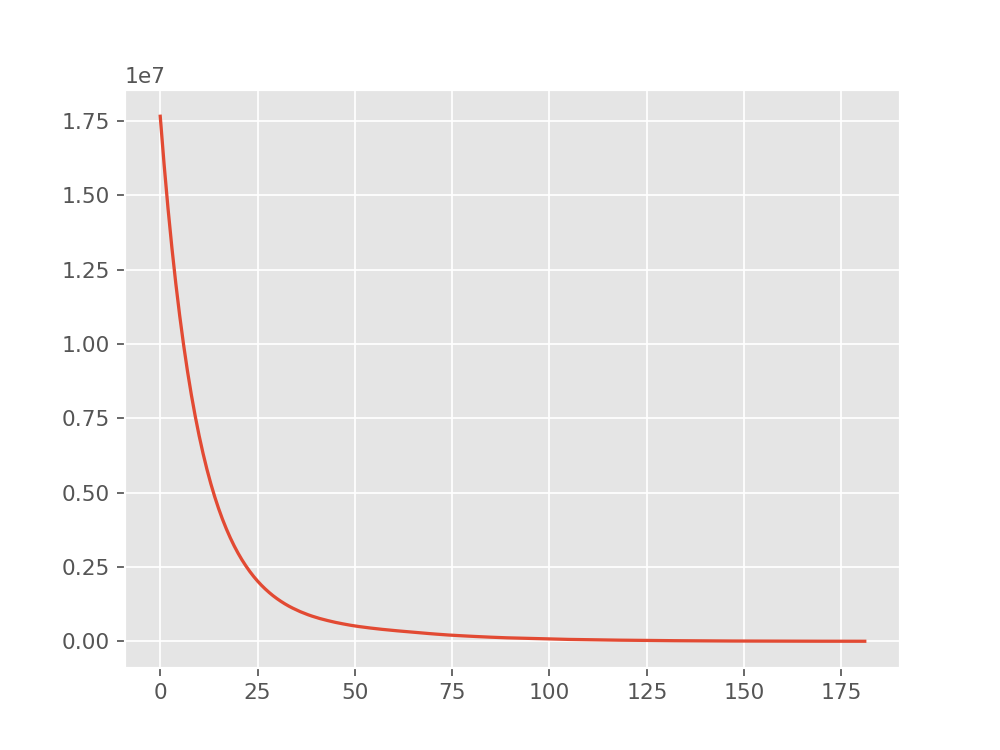

In [99]:
# get all cross validation errors
errors_val = [mean_squared_error(y_s, y_val_pred) for y_s in gb_regtree.staged_predict(X_val)]
# error vs number of trees (iteration)
_, axgbrt = plt.subplots()
axgbrt.plot(range(gb_regtree.n_estimators),errors_val)
# print('MSE (mean cross-validation) = {:.4f}'.format(min_val_error) )
# print('RMSE (mean cross-validation) = {:.4f}'.format(np.sqrt(min_val_error)) )